In [217]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [218]:
# Reading and vizualization dataset
df = pd.read_csv("datasets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [220]:
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


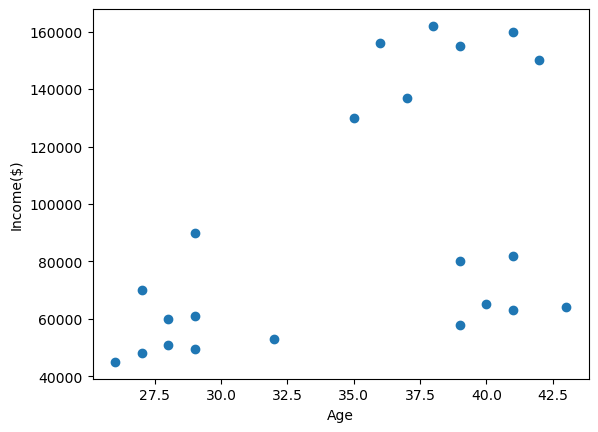

In [221]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)');

Just by looking at it, we can see that will need 3 n_cluster

# K-Means Clustering

In [222]:
# Processing model KMeans
km = KMeans(n_clusters=3)

# Predict model
y_predicted = km.fit_predict(df[['Age','Income($)']])

y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [223]:
# Add cluster predict at dataset
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [224]:
# Cluster Centers
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

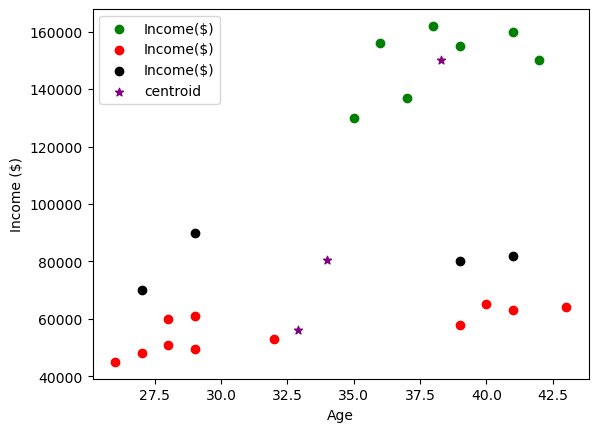

In [225]:
cores = ['green', 'red', 'black']
aux = [df[df.cluster==i] for i in range(3)]

for i in range(3):
    plt.scatter(aux[i].Age, aux[i]['Income($)'], color=cores[i],label = 'Income($)')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();


The clusters were not grouped correctly; red and black data are involved in this problem due to improper scaling. When we don't scale our features properly, we might encounter this issue, which is why we need to perform some preprocessing and use MinMaxScaler to scale these two features. Only then can we run our algorithm.

# Preprocessing using min max scaler

Min-Max Scaler is a data preprocessing technique that is used to normalize data, meaning to put all the data on the same scale. This is important for machine learning algorithms to work efficiently and not be influenced by the scale of the data.

Min-Max Scaler works by calculating the minimum and maximum value of each feature in the data. Then, the values of each feature are divided by the difference between the maximum and minimum values, so that all the values are between 0 and 1.

For example, if the values of a feature are between 0 and 100, Min-Max Scaler will transform them to be between 0 and 1. The value 0 will be transformed to 0, the value 100 will be transformed to 1, and so on.

Min-Max Scaler is a simple and effective data normalization technique. It is often used in conjunction with other data preprocessing algorithms, such as outlier removal.

Here are some examples of how Min-Max Scaler can be used:

To improve the efficiency of machine learning algorithms.
To reduce the impact of outliers in the data.
To make it easier to compare different datasets.
Min-Max Scaler has some drawbacks, such as:

It can be sensitive to outliers.
It can distort the original distribution of the data.

# K-Means Clustering 

### After Pre-processing MinMaxScaler

In [226]:
scaler = MinMaxScaler()

# Adjust scale Income column 
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Adjust scale Age column
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [227]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


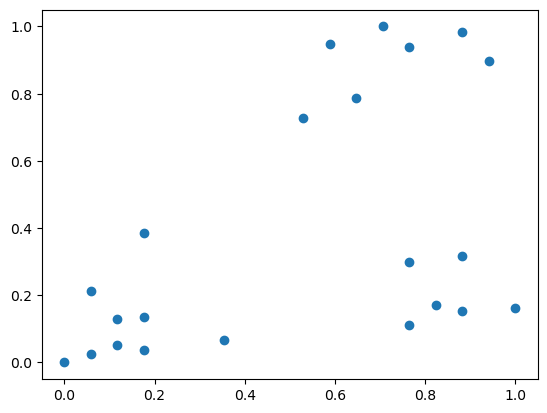

In [228]:
# Nem plot after scale adjusted
plt.scatter(df.Age,df['Income($)']);

In [246]:
# Processing new model KMeans
km = KMeans(n_clusters=3)

# Predict values
y_predicted = km.fit_predict(df[['Age','Income($)']])

y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [247]:
# Add new cluster at dataset
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [248]:
# New Clusters centers 
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

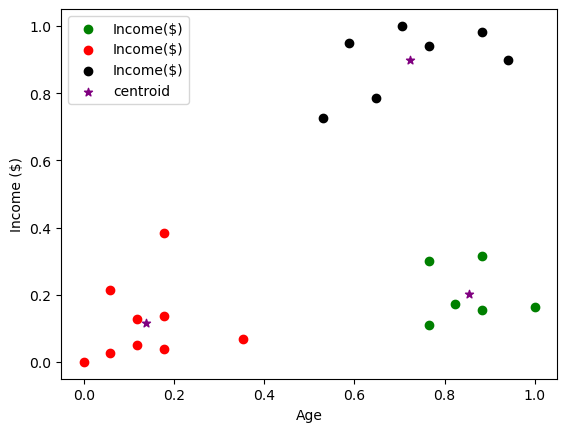

In [249]:
cores = ['green', 'red', 'black']
aux = [df[df.cluster==i] for i in range(3)]

for i in range(3):
    plt.scatter(aux[i].Age, aux[i]['Income($)'], color=cores[i],label = 'Income($)')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();

# Elbow Plot

An elbow plot is a graph that is used to determine the number of clusters in a data set. The plot is created by plotting the within-cluster sum of squares (WCSS) for different values of K, where K is the number of clusters. The WCSS is a measure of the variability within each cluster, and it is calculated by summing the squared distances between each point in a cluster and the centroid of that cluster.

An elbow plot should be constructed before applying a clustering algorithm. This is because the elbow plot helps to determine the optimal number of clusters in the data, which is an important input parameter for clustering algorithms.

Elbow Point: Look for the point on the plot where the decrease in variance or distortion starts to slow down, forming an "elbow." The elbow point is considered the optimal number of clusters because it represents a balance between minimizing within-cluster variance and avoiding overfitting.

In [240]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

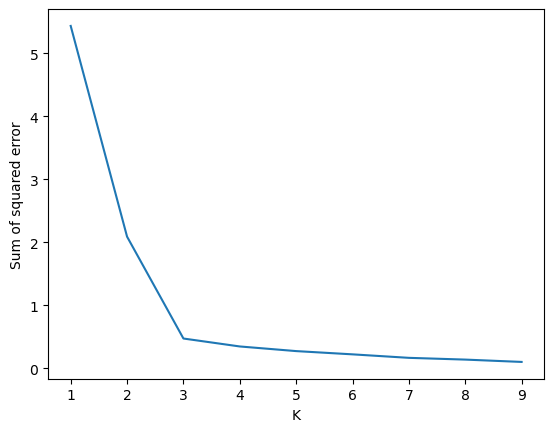

In [241]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse);